<a href="https://colab.research.google.com/github/AnirudhA3/pcb_board/blob/main/yolo_roboflow_model2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os, zipfile

# ✅ Path to your folder in Google Drive
base_path = "/content/drive/MyDrive/PCB datasets"
dest_path = "/content/pcb_dataset"  # where to extract them in Colab

# Make sure destination folder exists
os.makedirs(dest_path, exist_ok=True)

# Extract all zip files inside the folder
for file in os.listdir(base_path):
    if file.endswith(".zip"):
        zip_path = os.path.join(base_path, file)
        print(f"📦 Extracting: {zip_path}")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dest_path)

print("✅ All datasets extracted to:", dest_path)


📦 Extracting: /content/drive/MyDrive/PCB datasets/PCB-Component-Detection.v7-pcbv7.yolov8.zip
📦 Extracting: /content/drive/MyDrive/PCB datasets/PCB-Component-Detection.v6-pcbv6.yolov8.zip
📦 Extracting: /content/drive/MyDrive/PCB datasets/PCB-Component-Detection.v5-pcbv5.yolov8.zip
✅ All datasets extracted to: /content/pcb_dataset


In [6]:
!ls /content/pcb_dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
!cat /content/pcb_dataset/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['ICs', 'capacitors', 'diodes', 'fuses', 'inductors', 'resistors', 'transducers', 'transformers', 'transistors']

roboflow:
  workspace: research-pbbdl
  project: pcb-component-detection-dre7a
  version: 5
  license: Public Domain
  url: https://universe.roboflow.com/research-pbbdl/pcb-component-detection-dre7a/dataset/5

In [11]:
!pip install ultralytics --quiet


In [12]:
from ultralytics import YOLO
print("✅ YOLOv8 is successfully installed and ready to use!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ YOLOv8 is successfully installed and ready to use!


In [13]:
!yolo version


8.3.225


In [16]:
# ============================================================
# 🚀 YOLOv8 PCB Component Detection Training Pipeline
# Trains YOLOv8 on your PCB dataset and saves weights to Drive
# ============================================================

# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install YOLOv8 (Ultralytics)
!pip install ultralytics --quiet

# STEP 3: Import YOLO
from ultralytics import YOLO
import os

# STEP 4: Verify Dataset Path
dataset_path = "/content/pcb_dataset/data.yaml"
assert os.path.exists(dataset_path), f"❌ data.yaml not found at: {dataset_path}"
print(f"✅ Dataset found at: {dataset_path}")

# STEP 5: Choose where to save training results in Drive
save_dir = "/content/drive/MyDrive/YOLO/training_results_pcb"
os.makedirs(save_dir, exist_ok=True)
print(f"📁 Training results will be saved to: {save_dir}")

# STEP 6: Load YOLOv8 model (Nano = fastest)
model = YOLO("yolov8n.pt")  # or yolov8s.pt / yolov8m.pt / yolov8l.pt

# STEP 7: Train Model
model.train(
    data=dataset_path,     # dataset YAML file
    epochs=50,             # increase to 100+ for better results
    imgsz=640,             # image size
    batch=16,              # adjust based on GPU memory
    name="pcb_yolov8_v1",  # experiment name
    project=save_dir,      # save results to Drive
    workers=4,
    patience=10            # early stopping if no improvement
)

print("✅ Training Complete!")
print(f"📦 Check your results in: {save_dir}/pcb_yolov8_v1")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset found at: /content/pcb_dataset/data.yaml
📁 Training results will be saved to: /content/drive/MyDrive/YOLO/training_results_pcb
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pcb_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, 

In [20]:
import os

search_root = "/content/drive/My Drive/YOLO"
found_paths = []

for root, dirs, files in os.walk(search_root):
    for f in files:
        if f == "best.pt":
            found_paths.append(os.path.join(root, f))

if found_paths:
    print("✅ Found YOLO model weights:\n")
    for p in found_paths:
        print(" -", p)
else:
    print("❌ No 'best.pt' found. Check if Drive is mounted or model trained.")



✅ Found YOLO model weights:

 - /content/drive/My Drive/YOLO/training_results_pcb/pcb_yolov8_v1/weights/best.pt


In [22]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Found and loaded latest YOLO model:
/content/drive/My Drive/YOLO/training_results_pcb/pcb_yolov8_v1/weights/best.pt

📸 Upload your MASTER and TEST PCB images:


Saving dummy.jpg to dummy (1).jpg
Saving dummy1.jpg to dummy1.jpg
✅ Images loaded:
 - Master: dummy (1).jpg
 - Test: dummy1.jpg
📏 Cropped PCB region: x=578, y=460, w=1575, h=3299
📏 Cropped PCB region: x=0, y=1339, w=2708, h=1247

0: 640x320 7 ICss, 10 capacitorss, 2 resistorss, 40.8ms
Speed: 2.2ms preprocess, 40.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 320)

0: 320x640 7 ICss, 12 capacitorss, 2 resistorss, 37.7ms
Speed: 2.3ms preprocess, 37.7ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
✅ YOLO detection complete.
📂 Results saved to: /content/pcb_output


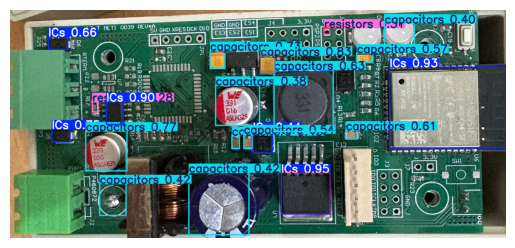


🟥 Visual comparison saved at: /content/pcb_output/difference_visual.png
📊 JSON differences saved at: /content/pcb_output/differences.json


In [26]:
# ==============================================================
# 🧠 PCB COMPONENT COMPARISON — YOLOv8 | Upload Images | JSON | Visual Diff
# ==============================================================

!pip install -q ultralytics opencv-python Pillow matplotlib numpy

# ==============================================================
# 🧠 Imports
# ==============================================================
import os, cv2, json, numpy as np, matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

# ==============================================================
# ⚙️ Setup
# ==============================================================
OUT_DIR = "/content/pcb_output"
os.makedirs(OUT_DIR, exist_ok=True)

# ==============================================================
# 🔍 Auto-Find the Latest YOLO Model (best.pt)
# ==============================================================
search_root = "/content/drive/My Drive/YOLO"
found_models = []

for root, dirs, files_in_dir in os.walk(search_root):
    for f in files_in_dir:
        if f == "best.pt":
            full_path = os.path.join(root, f)
            found_models.append((full_path, os.path.getmtime(full_path)))

if not found_models:
    raise FileNotFoundError("❌ No 'best.pt' found in your Drive. Please train or upload the model.")

found_models.sort(key=lambda x: x[1], reverse=True)
MODEL_PATH = found_models[0][0]

print(f"✅ Found and loaded latest YOLO model:\n{MODEL_PATH}")
model = YOLO(MODEL_PATH)

# ==============================================================
# ✂️ Auto-Crop PCB Area (Green Segmentation)
# ==============================================================
def auto_crop_board(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 30, 30])
    upper_green = np.array([100, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("⚠️ No green PCB region detected — using full image.")
        return image
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    print(f"📏 Cropped PCB region: x={x}, y={y}, w={w}, h={h}")
    return image[y:y+h, x:x+w]

# ==============================================================
# 🧩 YOLO Detection Function
# ==============================================================
def detect_with_yolo(image, prefix="PCB"):
    results = model(image)
    annotated = results[0].plot()
    comps = []
    for i, box in enumerate(results[0].boxes):
        cls_id = int(box.cls)
        label = results[0].names[cls_id]
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        comps.append({
            "id": f"{prefix}{i}",
            "label": label,
            "position": [int(x1), int(y1), int(x2 - x1), int(y2 - y1)]
        })
    return annotated, comps

# ==============================================================
# 📤 Upload MASTER and TEST PCB Images
# ==============================================================
print("\n📸 Upload your MASTER and TEST PCB images:")
uploaded = files.upload()
paths = list(uploaded.keys())

if len(paths) < 2:
    raise ValueError("❌ Please upload both MASTER and TEST PCB images.")

master_img = cv2.imread(paths[0])
test_img   = cv2.imread(paths[1])
print(f"✅ Images loaded:\n - Master: {paths[0]}\n - Test: {paths[1]}")

# ==============================================================
# 🔍 Detection + JSON Export
# ==============================================================
master_crop = auto_crop_board(master_img)
test_crop   = auto_crop_board(test_img)

master_detected, master_comps = detect_with_yolo(master_crop, "M")
test_detected, test_comps = detect_with_yolo(test_crop, "T")

master_json = {"components": master_comps}
test_json   = {"components": test_comps}

cv2.imwrite(f"{OUT_DIR}/master_detected.png", master_detected)
cv2.imwrite(f"{OUT_DIR}/test_detected.png", test_detected)
with open(f"{OUT_DIR}/master.json", "w") as f: json.dump(master_json, f, indent=2)
with open(f"{OUT_DIR}/test.json", "w") as f: json.dump(test_json, f, indent=2)

print(f"✅ YOLO detection complete.\n📂 Results saved to: {OUT_DIR}")

# ==============================================================
# 🔁 JSON Comparison + Visual Markup
# ==============================================================
def compare_json(master, test):
    diffs = []
    for m in master["components"]:
        match = next((t for t in test["components"] if t["label"] == m["label"]), None)
        if not match:
            diffs.append({"label": m["label"], "status": "missing", "position": m["position"]})
        else:
            dx = abs(m["position"][0] - match["position"][0])
            dy = abs(m["position"][1] - match["position"][1])
            if dx > 10 or dy > 10:
                diffs.append({
                    "label": m["label"],
                    "status": "moved",
                    "old_position": m["position"],
                    "new_position": match["position"]
                })
    return {"differences": diffs}

def visualize_differences(diff_json, test_img):
    for d in diff_json["differences"]:
        if d["status"] == "missing":
            x, y, w, h = d["position"]
            cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(test_img, f"{d['label']} missing", (x, y-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        elif d["status"] == "moved":
            nx, ny, nw, nh = d["new_position"]
            cv2.rectangle(test_img, (nx, ny), (nx+nw, ny+nh), (0,0,255), 2)
            cv2.putText(test_img, f"{d['label']} moved", (nx, ny-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    return test_img

diff_json = compare_json(master_json, test_json)
with open(f"{OUT_DIR}/differences.json", "w") as f: json.dump(diff_json, f, indent=2)

visualized = visualize_differences(diff_json, test_detected.copy())
cv2.imwrite(f"{OUT_DIR}/difference_visual.png", visualized)

plt.imshow(cv2.cvtColor(visualized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("\n🟥 Visual comparison saved at:", f"{OUT_DIR}/difference_visual.png")
print("📊 JSON differences saved at:", f"{OUT_DIR}/differences.json")
